<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT05/Modelo_entrenamiento__IT05_try01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I05-D001

In [19]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D001 = TimingCallback()
num_classes = 5

model_I05_D001 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D001.summary()

epochs=35
history_I05_D001 = model_I05_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/35
47/47 [==============================] - 171s 3s/step - loss: 145.2457 - accuracy: 0.2238 - val_loss: 1.6166 - val_accuracy: 0.1863
Epoch 2/35
47/47 [==============================] - 161s 3s/step - loss: 1.8399 - accuracy: 0.2027 - val_loss: 1.6206 - val_accuracy: 0.1511
Epoch 3/35
47/47 [==============================] - 158s 3s/step - loss: 1.6338 - accuracy: 0.2112 - val_loss: 1.6019 - val_accuracy: 0.2693
Epoch 4/35
47/47 [==============================] - 157s 3s/step - loss: 1.6067 - accuracy: 0.3046 - val_loss: 1.5947 - val_accuracy: 0.3243
Epoch 5/35
47/47 [==============================] - 159s 3s/step - loss: 1.5953 - accuracy: 0.3256 - val_loss: 1.5884 - val_accuracy: 0.3241
Epoch 6/35
47/47 [==============================] - 159s 3s/step - loss: 1.5880 - accuracy: 0.3265 - val_loss: 1.5830 - val_accuracy: 0.3240
Epoch 7/35
47/47 [==============================] - 157s 3s/step - loss: 1.5809 - accuracy: 0.3266 - val_loss: 1.5784 - val_accuracy: 0.3241
Epoch 8/35


[171.01025462150574, 160.8713092803955, 158.0992078781128, 157.42239618301392, 159.08926725387573, 158.73892855644226, 156.8483180999756, 153.82967233657837, 156.60319900512695, 153.7368860244751, 155.5445077419281, 155.70700192451477, 155.58376479148865, 154.96601939201355, 155.0756402015686, 155.3648557662964, 155.8889524936676, 157.3641300201416, 157.66895461082458, 157.38521361351013, 157.67152881622314, 157.36604857444763, 157.16821193695068, 157.6583743095398, 158.63513493537903, 157.30278038978577, 154.5153293609619, 155.09896230697632, 154.67940211296082, 154.39054322242737, 154.56238389015198, 156.60330057144165, 155.79093194007874, 156.8286850452423, 155.19541263580322]
El entrenamiento se demoro: 5490.265509843826 segundos
El entrenamiento se demoro: 91.50442516406378 minutos
accuracy => 0.32702183723449707
loss => 1.5553529262542725
val_accuracy => 0.32425886392593384
val_loss => 1.5576303005218506


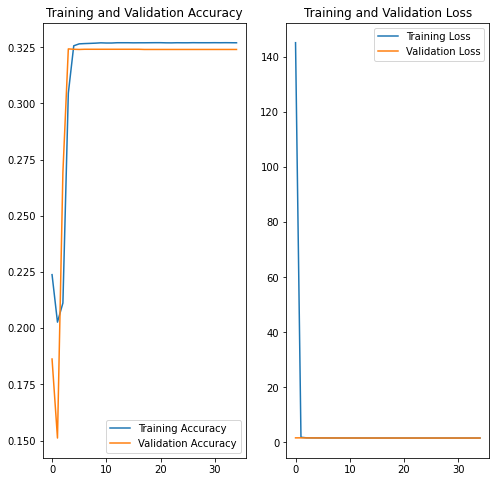

In [20]:
#-------------------------------------------------------------------------------
print(cb_I05_D001.times)
final_time = 0
for time in cb_I05_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D001.history['accuracy'])))
print('loss => '+ str(min(history_I05_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D001.history['accuracy']
val_acc = history_I05_D001.history['val_accuracy']

loss=history_I05_D001.history['loss']
val_loss=history_I05_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D002 = TimingCallback()
num_classes = 10

model_I05_D002 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D002.summary()

epochs=35
history_I05_D002 = model_I05_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/35
375/375 [==============================] - 111s 289ms/step - loss: 16.9319 - accuracy: 0.3659 - val_loss: 1.4188 - val_accuracy: 0.4392
Epoch 2/35
375/375 [==============================] - 111s 291ms/step - loss: 1.3140 - accuracy: 0.4640 - val_loss: 1.0327 - val_accuracy: 0.5644
Epoch 3/35
375/375 [==============================] - 111s 293ms/step - loss: 0.8570 - accuracy: 0.6446 - val_loss: 0.8501 - val_accuracy: 0.6243
Epoch 4/35
375/375 [==============================] - 111s 292ms/step - loss: 0.6694 - accuracy: 0.7274 - val_loss: 0.7232 - val_accuracy: 0.7062
Epoch 5/35
375/375 [==============================] - 111s 292ms/step - loss: 0.5488 - accuracy: 0.7838 - val_loss: 0.7279 - val_accuracy: 0.7008
Epoch 6/35
375/375 [==============================] - 109s 287ms/step - loss: 0.4389 - accuracy: 0.8310 - val_loss: 0.7009 - val_accuracy: 0.7251
Epoch 7/35
375/375 [==============================] - 109s 287ms/step - loss: 0.3630 - accuracy: 0.8624 - val_loss: 0.5720 

[111.42460775375366, 110.5170648097992, 111.32269644737244, 111.0714762210846, 111.06713104248047, 109.31058287620544, 109.36478543281555, 109.87550163269043, 108.92664408683777, 111.84570050239563, 109.38100004196167, 108.73528599739075, 113.74478650093079, 111.37468218803406, 110.39085912704468, 108.80286145210266, 106.4035792350769, 109.00954389572144, 108.87745523452759, 111.38198065757751, 108.98643207550049, 108.61410140991211, 110.8178071975708, 107.55095934867859, 109.91566562652588, 109.85419702529907, 111.34949350357056, 106.23554539680481, 111.15232515335083, 108.03695464134216, 108.47818779945374, 111.89864683151245, 109.02360248565674, 110.37763953208923, 106.83435106277466]
El entrenamiento se demoro: 3841.9541342258453 segundos
El entrenamiento se demoro: 64.03256890376409 minutos
accuracy => 0.9748027324676514
loss => 0.07471976429224014
val_accuracy => 0.9509811997413635
val_loss => 0.14791767299175262


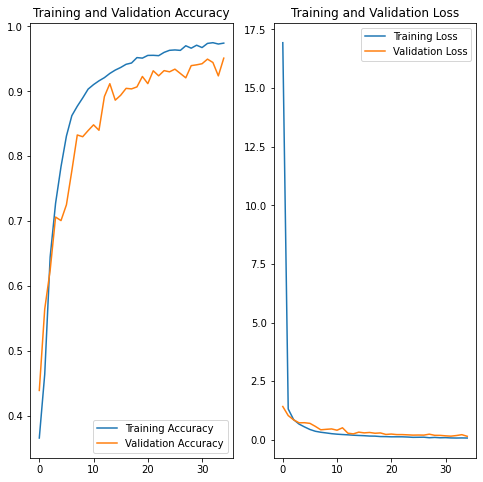

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D002.times)
final_time = 0
for time in cb_I05_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D002.history['accuracy'])))
print('loss => '+ str(min(history_I05_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D002.history['accuracy']
val_acc = history_I05_D002.history['val_accuracy']

loss=history_I05_D002.history['loss']
val_loss=history_I05_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D003

In [2]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D003 = TimingCallback()
num_classes = 5
epochs=20
 
model_I05_D003 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D003.summary()
 
 
history_I05_D003 = model_I05_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D003]
)
 
#-------------------------------------------------------------------------------

Epoch 1/20
47/47 [==============================] - 6528s 121s/step - loss: 169.7218 - accuracy: 0.2230 - val_loss: 2.0220 - val_accuracy: 0.2530
Epoch 2/20
47/47 [==============================] - 153s 3s/step - loss: 1.9712 - accuracy: 0.2983 - val_loss: 1.5762 - val_accuracy: 0.3337
Epoch 3/20
47/47 [==============================] - 151s 3s/step - loss: 1.5602 - accuracy: 0.3281 - val_loss: 1.4837 - val_accuracy: 0.3614
Epoch 4/20
47/47 [==============================] - 151s 3s/step - loss: 1.4867 - accuracy: 0.3447 - val_loss: 1.4318 - val_accuracy: 0.3717
Epoch 5/20
47/47 [==============================] - 151s 3s/step - loss: 1.4394 - accuracy: 0.3566 - val_loss: 1.3911 - val_accuracy: 0.3757
Epoch 6/20
47/47 [==============================] - 150s 3s/step - loss: 1.4029 - accuracy: 0.3604 - val_loss: 1.3781 - val_accuracy: 0.3627
Epoch 7/20
47/47 [==============================] - 149s 3s/step - loss: 1.3641 - accuracy: 0.3646 - val_loss: 1.3454 - val_accuracy: 0.3704
Epoch 8/

[6527.940470218658, 152.76003885269165, 151.17827892303467, 151.3875868320465, 150.72335624694824, 150.2718150615692, 149.29827642440796, 150.9016523361206, 150.7153835296631, 150.70735216140747, 150.70944333076477, 151.33754205703735, 150.48716807365417, 150.67655634880066, 150.97368574142456, 150.1751937866211, 151.45002102851868, 150.98172211647034, 150.97834372520447, 150.6875295639038]
El entrenamiento se demoro: 9394.341416358948 segundos
El entrenamiento se demoro: 156.5723569393158 minutos
accuracy => 0.4404408931732178
loss => 1.2296183109283447
val_accuracy => 0.40951982140541077
val_loss => 1.2952992916107178


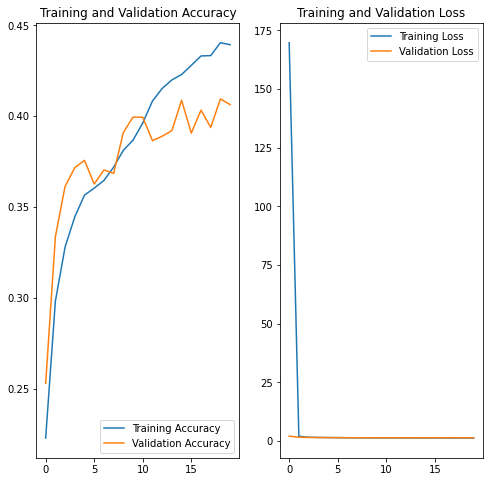

In [3]:
#-------------------------------------------------------------------------------

print(cb_I05_D003.times)
final_time = 0
for time in cb_I05_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D003.history['accuracy'])))
print('loss => '+ str(min(history_I05_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D003.history['accuracy']
val_acc = history_I05_D003.history['val_accuracy']

loss=history_I05_D003.history['loss']
val_loss=history_I05_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D004 = TimingCallback()
num_classes = 10

model_I05_D004 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)

])
model_I05_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D004.summary()

epochs=35
history_I05_D004 = model_I05_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/35
47/47 [==============================] - 181s 3s/step - loss: 125.0498 - accuracy: 0.2596 - val_loss: 2.3702 - val_accuracy: 0.1398
Epoch 2/35
47/47 [==============================] - 169s 3s/step - loss: 1.6482 - accuracy: 0.3480 - val_loss: 2.1703 - val_accuracy: 0.3244
Epoch 3/35
47/47 [==============================] - 169s 3s/step - loss: 1.5337 - accuracy: 0.4147 - val_loss: 2.0239 - val_accuracy: 0.3254
Epoch 4/35
47/47 [==============================] - 170s 3s/step - loss: 1.3826 - accuracy: 0.4677 - val_loss: 1.5608 - val_accuracy: 0.4916
Epoch 5/35
47/47 [==============================] - 170s 3s/step - loss: 1.2609 - accuracy: 0.5116 - val_loss: 1.3748 - val_accuracy: 0.5078
Epoch 6/35
47/47 [==============================] - 170s 3s/step - loss: 1.1770 - accuracy: 0.5392 - val_loss: 1.2513 - val_accuracy: 0.5544
Epoch 7/35
47/47 [==============================] - 171s 3s/step - loss: 1.1207 - accuracy: 0.5588 - val_loss: 1.1706 - val_accuracy: 0.5754
Epoch 8/35


[181.21720004081726, 169.18405556678772, 169.36143803596497, 170.18561124801636, 170.4066035747528, 170.09355545043945, 170.70589208602905, 170.11104702949524, 170.0414366722107, 170.2689971923828, 169.90179705619812, 169.74684262275696, 170.12837672233582, 170.79872155189514, 169.8664677143097, 169.78353786468506, 169.68378829956055, 169.51007223129272, 170.21529459953308, 169.26775884628296, 169.72933197021484, 169.84053301811218, 169.9101288318634, 170.1388235092163, 168.80679082870483, 169.54541897773743, 168.97954273223877, 168.2203598022461, 164.9861717224121, 165.60420155525208, 167.61326694488525, 168.41559624671936, 166.13011622428894, 166.7978630065918, 168.13311314582825]
El entrenamiento se demoro: 5933.329752922058 segundos
El entrenamiento se demoro: 98.88882921536764 minutos
accuracy => 0.8871445655822754
loss => 0.41195887327194214
val_accuracy => 0.842839241027832
val_loss => 0.5441314578056335


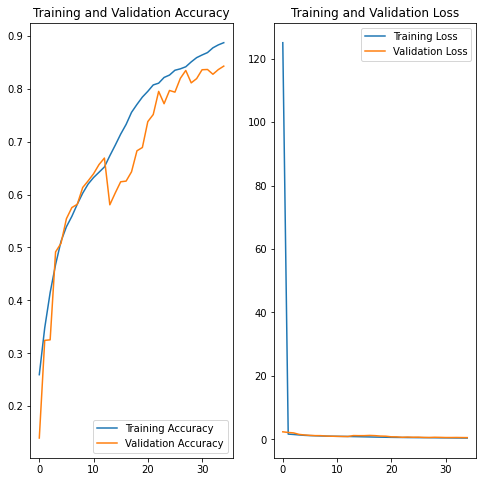

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D004.times)
final_time = 0
for time in cb_I05_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D004.history['accuracy'])))
print('loss => '+ str(min(history_I05_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D004.history['accuracy']
val_acc = history_I05_D004.history['val_accuracy']

loss=history_I05_D004.history['loss']
val_loss=history_I05_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D005

In [4]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D005 = TimingCallback()
num_classes = 10

model_I05_D005 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D005.summary()

epochs=35
history_I05_D005 = model_I05_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/35
47/47 [==============================] - 177s 3s/step - loss: 250.7495 - accuracy: 0.2510 - val_loss: 6.9280 - val_accuracy: 0.2610
Epoch 2/35
47/47 [==============================] - 163s 3s/step - loss: 5.2090 - accuracy: 0.4204 - val_loss: 5.5914 - val_accuracy: 0.2779
Epoch 3/35
47/47 [==============================] - 163s 3s/step - loss: 4.9436 - accuracy: 0.4401 - val_loss: 5.7449 - val_accuracy: 0.2739
Epoch 4/35
47/47 [==============================] - 164s 3s/step - loss: 4.7506 - accuracy: 0.4554 - val_loss: 5.5831 - val_accuracy: 0.3445
Epoch 5/35
47/47 [==============================] - 163s 3s/step - loss: 4.5510 - accuracy: 0.4815 - val_loss: 4.8508 - val_accuracy: 0.4660
Epoch 6/35
47/47 [==============================] - 162s 3s/step - loss: 4.3618 - accuracy: 0.5171 - val_loss: 4.7946 - val_accuracy: 0.4914
Epoch 7/35
47/47 [==============================] - 163s 3s/step - loss: 4.2117 - accuracy: 0.5383 - val_loss: 4.4178 - val_accuracy: 0.5382
Epoch 8/35


[177.37254118919373, 162.742032289505, 163.00099301338196, 163.5455195903778, 162.88470220565796, 162.3145351409912, 162.70312595367432, 163.07572436332703, 163.3756604194641, 162.90606236457825, 162.51674842834473, 162.60181784629822, 162.9744210243225, 163.14324736595154, 162.7376582622528, 162.25665712356567, 163.9492483139038, 162.13351821899414, 162.6633231639862, 161.9224739074707, 162.75559425354004, 162.31893110275269, 163.015230178833, 162.48761701583862, 161.95062065124512, 161.83764386177063, 161.48029041290283, 162.67644453048706, 162.96175408363342, 161.91342687606812, 163.59748125076294, 163.3756639957428, 163.18251419067383, 163.56649923324585, 162.72335767745972]
El entrenamiento se demoro: 5710.663079500198 segundos
El entrenamiento se demoro: 95.17771799166998 minutos
accuracy => 0.8847647309303284
loss => 2.008702039718628
val_accuracy => 0.7781211137771606
val_loss => 2.3573920726776123


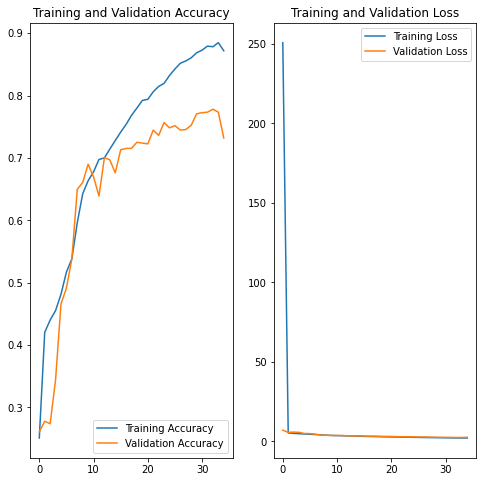

In [5]:
#-------------------------------------------------------------------------------

print(cb_I05_D005.times)
final_time = 0
for time in cb_I05_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D005.history['accuracy'])))
print('loss => '+ str(min(history_I05_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D005.history['accuracy']
val_acc = history_I05_D005.history['val_accuracy']

loss=history_I05_D005.history['loss']
val_loss=history_I05_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D006

In [6]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D006 = TimingCallback()
num_classes = 10

model_I05_D006 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)

])
model_I05_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D006.summary()

epochs=35
history_I05_D006 = model_I05_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/35
47/47 [==============================] - 163s 3s/step - loss: 117.9640 - accuracy: 0.2870 - val_loss: 1.9852 - val_accuracy: 0.1449
Epoch 2/35
47/47 [==============================] - 162s 3s/step - loss: 1.5077 - accuracy: 0.3825 - val_loss: 1.9439 - val_accuracy: 0.1607
Epoch 3/35
47/47 [==============================] - 162s 3s/step - loss: 1.3838 - accuracy: 0.4363 - val_loss: 1.8456 - val_accuracy: 0.3011
Epoch 4/35
47/47 [==============================] - 162s 3s/step - loss: 1.2265 - accuracy: 0.4912 - val_loss: 1.2889 - val_accuracy: 0.5330
Epoch 5/35
47/47 [==============================] - 162s 3s/step - loss: 0.9719 - accuracy: 0.5932 - val_loss: 1.1667 - val_accuracy: 0.5914
Epoch 6/35
47/47 [==============================] - 162s 3s/step - loss: 0.8547 - accuracy: 0.6409 - val_loss: 0.9802 - val_accuracy: 0.6573
Epoch 7/35
47/47 [==============================] - 162s 3s/step - loss: 0.7815 - accuracy: 0.6728 - val_loss: 0.8865 - val_accuracy: 0.6807
Epoch 8/35


[162.81974124908447, 161.7706437110901, 161.8003273010254, 161.55961179733276, 161.6704170703888, 162.30021405220032, 162.32177567481995, 161.4924030303955, 161.15044498443604, 160.92030024528503, 162.05936551094055, 161.61473202705383, 161.65578770637512, 162.37046790122986, 162.6509346961975, 161.41740584373474, 162.35532450675964, 162.43631887435913, 162.99636387825012, 162.6713399887085, 162.77275443077087, 162.44505262374878, 163.0111575126648, 162.04950785636902, 162.0911316871643, 161.69695854187012, 161.09946584701538, 162.2241587638855, 161.87256693840027, 162.38505339622498, 162.63964366912842, 162.93534517288208, 162.8738191127777, 162.20570945739746, 162.20603561401367]
El entrenamiento se demoro: 5674.542280673981 segundos
El entrenamiento se demoro: 94.57570467789968 minutos
accuracy => 0.9295227527618408
loss => 0.18977375328540802
val_accuracy => 0.91457200050354
val_loss => 0.242278590798378


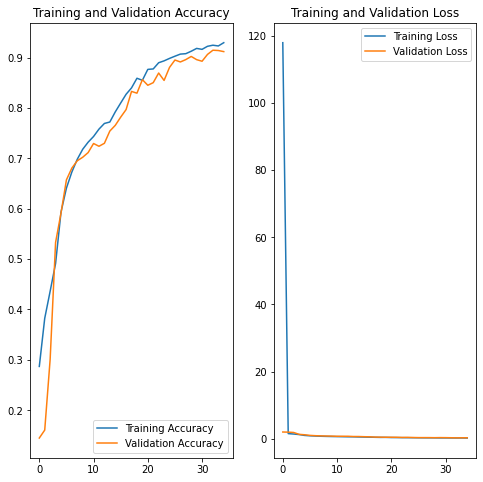

In [7]:
#-------------------------------------------------------------------------------

print(cb_I05_D006.times)
final_time = 0
for time in cb_I05_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D006.history['accuracy'])))
print('loss => '+ str(min(history_I05_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D006.history['accuracy']
val_acc = history_I05_D006.history['val_accuracy']

loss=history_I05_D006.history['loss']
val_loss=history_I05_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D007

In [8]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D007 = TimingCallback()
num_classes = 10

model_I05_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D007.summary()

epochs=35
history_I05_D007 = model_I05_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/35
47/47 [==============================] - 164s 3s/step - loss: 134.8960 - accuracy: 0.3091 - val_loss: 5.6322 - val_accuracy: 0.3213
Epoch 2/35
47/47 [==============================] - 163s 3s/step - loss: 4.7271 - accuracy: 0.4622 - val_loss: 5.2756 - val_accuracy: 0.3117
Epoch 3/35
47/47 [==============================] - 163s 3s/step - loss: 4.3219 - accuracy: 0.5392 - val_loss: 4.7605 - val_accuracy: 0.4544
Epoch 4/35
47/47 [==============================] - 163s 3s/step - loss: 3.9439 - accuracy: 0.6277 - val_loss: 4.1537 - val_accuracy: 0.6168
Epoch 5/35
47/47 [==============================] - 162s 3s/step - loss: 3.6603 - accuracy: 0.6903 - val_loss: 3.7126 - val_accuracy: 0.6965
Epoch 6/35
47/47 [==============================] - 162s 3s/step - loss: 3.4534 - accuracy: 0.7316 - val_loss: 3.4433 - val_accuracy: 0.7380
Epoch 7/35
47/47 [==============================] - 163s 3s/step - loss: 3.2822 - accuracy: 0.7645 - val_loss: 3.2195 - val_accuracy: 0.7778
Epoch 8/35


[163.89581561088562, 163.14773654937744, 162.66931986808777, 163.18883872032166, 162.46355319023132, 162.29669094085693, 163.1202096939087, 163.26219749450684, 162.3993546962738, 162.7781319618225, 162.74253702163696, 162.88869285583496, 161.70095872879028, 162.06322979927063, 162.12427282333374, 162.34456706047058, 162.58711504936218, 162.72146487236023, 162.82353806495667, 163.39104008674622, 162.21119499206543, 162.86176109313965, 162.1891224384308, 162.3790955543518, 163.30017066001892, 163.22099614143372, 163.18350338935852, 163.5754952430725, 163.83846926689148, 162.85466980934143, 163.39926767349243, 163.25919604301453, 163.4593391418457, 163.8618347644806, 163.33647656440735]
El entrenamiento se demoro: 5701.53985786438 segundos
El entrenamiento se demoro: 95.02566429773967 minutos
accuracy => 0.9525280594825745
loss => 1.3847934007644653
val_accuracy => 0.9443841576576233
val_loss => 1.4058465957641602


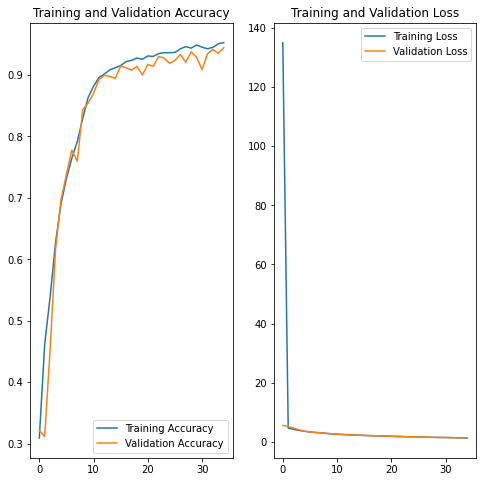

In [9]:
#-------------------------------------------------------------------------------

print(cb_I05_D007.times)
final_time = 0
for time in cb_I05_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D007.history['accuracy'])))
print('loss => '+ str(min(history_I05_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D007.history['accuracy']
val_acc = history_I05_D007.history['val_accuracy']

loss=history_I05_D007.history['loss']
val_loss=history_I05_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D007 try02

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D007 = TimingCallback()
num_classes = 10

model_I05_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D007.summary()

epochs=35
history_I05_D007 = model_I05_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/35
1497/1497 [==============================] - ETA: 0s - loss: 5.6406 - accuracy: 0.6374

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D007.times)
final_time = 0
for time in cb_I05_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D007.history['accuracy'])))
print('loss => '+ str(min(history_I05_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D007.history['accuracy']
val_acc = history_I05_D007.history['val_accuracy']

loss=history_I05_D007.history['loss']
val_loss=history_I05_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()